In [1]:
# SE PUEDE OMITIR ESTA CELDA. En ese caso modificar path de carpetas
# que contienen las bases de datos de Arterias Coronarias y Retinas. (Imagenes -> Angiogramas, Imagenes -> retina)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Código auxiliar de la Tarea 1

## Funciones auxiliares

### Funciones para el manejo de archivos

In [2]:
import os

def names_generator(n_names=1, s='', format='.pgm', flag=False):
    """
    Generador de nombres de archivos {i.format}, i=1,...,n_images.
    Args:
        n_names (int): Cantidad de nombres a generar.
        s (string): Cadena extra que se quiera agregar al nombre.
        format (string): Formato del archivo.
    Ejemplos:
        names_generator(5) = ('1.pgm', '2.pgm', '3.pgm', '4.pgm', '5.pgm')
        names_generator(2, '_gt', 'jpg') = ('1_gt.jpg', '2_gt.jpg')
        names_generator(2, '_gt') = ('1_gt.pgm', '2_gt.pgm')
        names_generator() = ('1.pgm')
    """
    names = range(n_names)
    for name in names:
        path = ''
        if name < 9 and flag:
            path =  '0'
        path += str(name + 1) + s + format
        yield path

def get_names_from_path(path):    
    """
    Regresa nombres de archivos eel directorio getcwd() + path
    """
    # Obtenemos directorio de la carpeta con archivos
    dataset_dir = os.path.abspath(os.getcwd()) + path
    # Obtenemos lista de archivos
    names = os.listdir(dataset_dir)
    return names

### Funciones para visualización de imágenes

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def print_images(images, n=1, m=1, title=''):
    """
    Imprime las imagenes con su correspondiente titulo en un grid de n por m
    Args:
        images (list(np.ndarray)): Imagenes a imprimir.
        n (int): Cantidad de filas.
        m (int): Cantidad de columnas.
    """
    images = images[:n*m]
    fig, axs = plt.subplots(
        nrows=n, ncols=m, 
        figsize=(12, 8), 
        subplot_kw={
            'xticks': [], 
            'yticks': []
        }
    )
    for ax, image in zip(axs.flat, images):
        ax.imshow(image,vmin=image.min(), vmax=image.max(), cmap='gray')
        ax.set_title(title)
    plt.tight_layout()
    plt.show()

def print_graphs(graphs, n=1, m=1, title=''):
    """
    Imprime las graficas con su correspondiente titulo en un grid de n por m
    Args:
        graphs (list(np.ndarray)): Graficas a imprimir.
        n (int): Cantidad de filas.
        m (int): Cantidad de columnas.
    """
    graphs = graphs[:n*m]
    fig, axs = plt.subplots(
        nrows=n, ncols=m, 
        figsize=(12, 8), 
    )
    for ax, graph in zip(axs.flat, graphs):
        ax.plot(graph)#, cmap='gray')
        ax.set_title(title)
    plt.tight_layout()
    plt.show()

# Funciones para cálculo de índices de desempeño

## Funciones para cálculo de índices (Código de Tarea 1)

### Métricas

* Sensitivity
* Accuracy
* Misclassification error 
* Positive predictive value
* Negative predictive value
* Jaccard index
* Dicecoefficient

In [4]:
def sensitivity(matrix):
    tn, fp, fn, tp = matrix.ravel()
    return tp / (tp + fn)

def specificity(matrix):
    tn, fp, fn, tp = matrix.ravel()
    return tn / (tn + fp)

def accuracy(matrix):
    tn, fp, fn, tp = matrix.ravel()
    return (tp + tn) / (tp + tn + fp + fn)

def misclassification_error(matrix):
    return 1 - accuracy(matrix)

def positive_predictive_value(matrix):
    tn, fp, fn, tp = matrix.ravel()
    return tp / (tp + fp)

def negative_predictive_value(matrix):
    tn, fp, fn, tp = matrix.ravel()
    return tn / (tn + fn)

def jaccard_index(matrix):
    tn, fp, fn, tp = matrix.ravel()
    return tp / (tp + fp + fn)

def dice_coefficient(matrix):
    tn, fp, fn, tp = matrix.ravel()
    return (2*tp) / ( 2*tp + fp + fn)

### Funciones auxiliares

In [5]:
from sklearn.metrics import confusion_matrix

def get_confusion_matrix(image_gt, image_si):
    '''
    Regresa matriz de confusion para clasificacion binaria a partir de
    una imagen binarizada y su correspondiente G.T.
    Args:
    '''
    y_true = image_gt.reshape(-1)
    y_pred = image_si.reshape(-1)

    matrix = confusion_matrix(y_true, y_pred, labels=[0, 255])

    return matrix

In [6]:
def performance_indices(images_gt, images_si):
    '''
    Imprime indices de desempenio de la respuesta dada por un clasificador
    '''
    sensitivity_list = []
    specificity_list = []
    accuracy_list = []
    misclassification_list = []
    ppv_list = []
    npv_list = []
    jaccard_list = []
    dice_list = []

    for i, (image_gt, image_si) in enumerate(zip(images_gt, images_si)):
        # Obtenemos tabla de clasificacion
        matrix = get_confusion_matrix(image_gt, image_si)
        # Metricas ...
        sensitivity_list.append(sensitivity(matrix))
        specificity_list.append(specificity(matrix))
        accuracy_list.append(accuracy(matrix))
        misclassification_list.append(misclassification_error(matrix))
        ppv_list.append(positive_predictive_value(matrix))
        npv_list.append(negative_predictive_value(matrix))
        jaccard_list.append(jaccard_index(matrix))
        dice_list.append(dice_coefficient(matrix))
    
    sensitivity_mean = np.mean(sensitivity_list)
    specificity_mean = np.mean(specificity_list)
    accuracy_mean = np.mean(accuracy_list)
    misclassification_mean = np.mean(misclassification_list)
    ppv_mean = np.mean(ppv_list)
    npv_mean = np.mean(npv_list)
    jaccard_mean = np.mean(jaccard_list)
    dice_mean = np.mean(dice_list)

    print("")
    print("Sensitivity : " + str(sensitivity_mean))
    print("Specificity : " + str(specificity_mean))
    print("Accuracy : " + str(accuracy_mean))
    print("Misclassification : " + str(misclassification_mean))
    print("PPV : " + str(ppv_mean))
    print("NPV : " + str(npv_mean))
    print("jaccard Index : " + str(jaccard_mean))
    print("Dice Coefficient: " + str(dice_mean))
    print("")

## Área bajo la curva ROC (Característica Operativa del Receptor)
Esta métrica es la más utilizada en la literatura sobre detección de vasos, ya que puede evaluar el rendimiento de las respuestas de los filtros de escala de grises. 

El valor de $A_z$ (Área bajo la curva __ROC__) se calcula sobre la respuesta de filtro obtenida de la plantilla de nivel de gris mediante el uso de un umbral deslizante para obtener la fracción de verdadero positivo (__TPF__) y la fracción de falso positivo (__FPF__). 

* La curva ROC se calcula con ayuda de la función `roc_curve` de `sklearn.metrics`. (__COMENTARIO__: También implementé una funcióón propia para calcular la curva ROC, solo que después me di cuenta que estáá libreríía calculaba lo mismo).
* El área bajo la curva se calcula mediante el método del trapecio con ayuda de la función `auc` de `sklearn.metrics`.

In [7]:
from sklearn import metrics

def roc_curve(filtered_image, image_gt, threshold_values=range(256)):
    ''' 
    Retorna curva de ROC:
        Para cada valor de umbral t \in [0,255] se calcula un punto en el 
        espacio de ROC [x_t, y_t], donde 
            x_t = False Positive Rate obtenido al umbralizar con un valor t
            y_t = True Positive Rate obtenido al umbralizar con un valor t 
    args:
        image_filtered (np.ndarray): Imagen filtrada (Caracteristicas resaltadas)
        image_gt (np.ndarray): G.T. de la imagen original
    return:
        FPR_values (list): fpr_t para cada t \in [0, 255]
        TPR_values (list): tpr_t para cada t \in [0, 255]
    '''

    # Inicializamos listas de valores las cuales se retornaran
    FPR_values = []
    TPR_values = []
    
    # Umbral deslizante ...
    for t in threshold_values:
        # Binariamos la imagen con el umbral
        _, image_si = cv2.threshold(
            filtered_image, t, 255, 
            cv2.THRESH_BINARY
        )
        # Obtenemos tabla de clasificacion
        matrix = get_confusion_matrix(image_gt, image_si)
        # Obtenemos el punto [x_t,y_t] en el espacio de ROC
        FPR = 1 - specificity(matrix)
        TPR = sensitivity(matrix)
        # Actualizamos listas de valores
        FPR_values.append(FPR)
        TPR_values.append(TPR)

    # Retornamos ambas listas de valores
    return FPR_values, TPR_values

def plot_roc_curve(image_gt, filtered_image, plot_version=True, plot=False):
    '''
    Imprime la curva de ROC y ademas retorna area bajo curva:
    args:
        image_gt (np.ndarray): G.T. de la imagen original
        image_filtered (np.ndarray): Imagen filtrada (Caracteristicas resaltadas)
        plot_version (bool): Flag que indica que version de grafica se mostrara
    return:
        roc_auc (float): Area bajo la curva ROC.
    '''
    # Obtenemos indices de desempenio FPR y TPR
    fpr, tpr, thresholds = metrics.roc_curve(
        np.array(image_gt).ravel(), 
        np.array(filtered_image).ravel(),
        pos_label=255
    )

    # Calculamos area bajo la curva (metrics.auc usa regla del trapecio)
    roc_auc = metrics.auc(fpr, tpr)
    # Si es necesario dibujar lo hacemos ...
    if plot :
        # Dibujamos la grafica del espacio de ROC
        if plot_version :
            # Version 1
            plt.figure()
            lw = 2
            plt.plot(fpr, tpr, color='darkorange',
                    lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
            plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic example')
            plt.legend(loc="lower right")
            plt.show()
        else :
            # Version 2
            display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
            display.plot()  
            plt.show()
    
    return roc_auc

# Algoritmo Genético


## Funciones del Algoritmo Genetico

### Población Inicial

La forma estándar de generar una población inicial es asignar un valor aleatorio del dominio permitido a cada uno de los genes de cada cromosoma.

In [8]:
from scipy.stats import bernoulli

def stochastic_initialization(n_individuals, dim_b, p = 0.5):
    """
    Crea n individuos de dimension dim con ayuda de ensayos bernoulli 
    Args
        n_individuals (Int): Numero de individuos que se crearan aleatoriamente
        dim           (Int): Dimension de los individuos (Array de 0's y 1's)
    Returns:
        Poblacion (Matriz Numpy de entradas binarias)
    """
    ans = np.array([bernoulli.rvs(p=p, size=dim_b) for i in range(n_individuals)]) # Se podria utilizar mascara de bits
    return ans

def a_priori_initialization(n_individuals, dim_b, p = 0.5):
    """
    Crea n individuos de dimension dim con ayuda de ensayos bernoulli 
    Args
        n_individuals (Int): Numero de individuos que se crearan aleatoriamente
        dim           (Int): Dimension de los individuos (Array de 0's y 1's)
    Returns:
        Poblacion (Matriz Numpy de entradas binarias)
    """
    ans = np.array([bernoulli.rvs(p=p, size=dim_b) for i in range(n_individuals)]) # Se podria utilizar mascara de bits
    return ans

La función `create` usa `n_individuals*dim_b` bytes de memoria. Se podría modificar para usar máscaras de bits para reducir.

### Codificación y Decodificación

In [9]:
def decode(b, x_dim, d_dim, x_min=0, x_max=1.0, normalize=False):
    '''
    Args:
        b (Array numpy): Representacion codificada del individuo. Vector binario 
                         de dimension x_dim*d_dim que represeta un individuo.
        x_dim (int): Dimension del espacio de busqueda.
        d_dim (int): Tamanio de refinamiento de dominio de variable x_i de x.
        x_min (float): Minimo valor posible en el dominio de x_i (para toda i)
        x_max (float): Maximo valor posible en el dominio de x_i (para toda i) 
        normalize (bool): Si es False los valores de x se quedan
                          en [0, 2^{d_dim}-1], de lo contrario 
                          se quedan en [x_min,x_max]
    '''
    # Inicializamos vector decodificado en 0's
    x = np.zeros(x_dim, dtype=np.int64)
    for i, b_i_mask in enumerate(b.reshape((x_dim, d_dim))):
        # Cada fila representa la expresion binaria del valor x_i
        pow_2 = 1
        for bit in b_i_mask:
            if bit :
                x[i] += pow_2
            pow_2 *= 2
    # Si se desea que los valores esten en [x_min, x_max]
    if normalize :
        x = np.array(x, dtype=np.float32)
        x /= 2 ** d_dim
        x *= (x_max - x_min)
        x += x_min

    return x

### Evaluación de individuos

In [10]:
def evaluate(fitness, individuals, x_dim, d_dim, x_min=0.0, x_max=1.0, normalize_decoding=False):
    """
    Evalua la expresion booleana en todos los individuos de la poblacion con la 
    funcion fitness
        (Array Numpy con los resultados de fitness para cada individuo)
    Args:
        fitness (Function): Funcion fitness
        individuals (Array numpy): Individpoblaciónuos para evaluar la expresion
    """
    return np.array([fitness(decode(individual, x_dim, d_dim, x_min, x_max, normalize_decoding)) 
                        for individual in individuals ])

### Seleccion
Se selecciona una nueva población de soluciones candidatas al final de cada generación para que sirva como población de la próxima generación. La nueva población puede seleccionarse solo de la descendencia, o tanto de los padres como de la descendencia (En este caso se toma de ambas). El operador de selección debe asegurarse de que los buenos individuos sobrevivan hasta las próximas generaciones.


In [11]:
# take the second element for sort
def take_first(element):
    return element[0]

def select(C, scores, n_individuals, minimum=True):
    '''
    ELITISMO:
    Aseguraramos que los mejores individuos de la población actual sobrevivan 
    hasta la próxima generación. Los mejores individuos se copian en la nueva 
    población sin mutar.
    Args:
        C (Matriz numpy): La poblacion de individuos
        scores (Array numpy): Resultado de la evaluacion de cada individuo
        n_individuals (Int): Cantidad de individuos a elegir
    '''
    # Se ordenan los individuos de acuerdo a su score y devolvemos
    # los n mejores ...
    ans = []
    for score, x in sorted(zip(scores, C), key=take_first,reverse=not minimum)[:n_individuals]:
        ans.append(x)
    return np.array(ans)

### Operadores de reproducción
La __Reproducción__ es el proceso de producir descendencia de padres seleccionados mediante la aplicación de operadores de cruce y/o mutación.   

#### Cruce
El __Cruce__ es el proceso de __crear uno o más individuos nuevos mediante la combinación de material genético seleccionado al azar de dos o más padres__. Si la selección se centra en los individuos más aptos, la presión de selección puede causar una convergencia prematura debido a la diversidad reducida de las nuevas poblaciones.

In [12]:
def crossover(parent_1, parent_2):
    """
    Crossover (Por parejas)
    Dos posiciones de bits se seleccionan aleatoriamente y las cadenas de bits 
    entre estos puntos se intercambian.
    Args:
    """
    # Eleccion aleatorio de indice de bit para crossover
    index = np.random.choice(len(parent_1), 1)[0]
    # Copiamos la informacion de los padres
    offspring_1 = parent_1.copy()
    offspring_2 = parent_2.copy()
    # Intercambiamos informacion
    offspring_1[index:] = parent_2[index:]
    offspring_2[index:] = parent_1[index:]
    
    return offspring_1, offspring_2

def cross(C):
    '''
    Crossover (Por parejas): Dada una poblacion C de individuos, se forman
    parejas para crear una descendencia nueva con la misma cantidad de
    individuos que la original.
    '''
    ans = []
    n_individuals = len(C)
    # Suponemos cantidad par de individuos
    middle = n_individuals // 2
    for i in range(middle):
        # Apareamos el primero con el ultimo, el segundo con el penultimo, etc.
        off1, off2 = crossover(C[i], C[n_individuals - i - 1])
        ans.append(off1)
        ans.append(off2)
    return np.array(ans)

#### Mutación
La __Mutación__ es el proceso de __cambiar aleatoriamente los valores de los genes en un cromosoma__. 

El objetivo es introducir nuevo material genético en la población, aumentando así la diversidad genética. La mutación debe aplicarse con cuidado para no distorsionar el buen material genético en individuos altamente aptos. Por esta razón, __la mutación se suele aplicar con baja probabilidad__. Alternativamente, __la probabilidad de mutación puede hacerse proporcional a la aptitud de los individuos__: cuanto menos apta el individuo, más muta. 

Para promover la exploración en las primeras generaciones, __la probabilidad de mutación se puede inicializar a un valor grande, que luego se reduce con el tiempo__ para permitir la explotación durante las generaciones finales.

In [13]:
def mutate(bit_string, probability):
    """
    Mutacion uniforme.
    Las posiciones de los bits se eligen aleatoriamente y los valores de los 
    bits correspondientes se niegan.
    Args:
        bit_string (Array Numpy): Cadena binaria que representa a un individuo
        probability (Float): probabilidad de invertir un bit 
    """
    mutant = bit_string.copy()
    for k, b_k in enumerate(bit_string):
        if bernoulli.rvs(p=probability) : 
            mutant[k] = not b_k
    return mutant

def mutation(C, probability):

    return np.array([ mutate(individual, probability) for individual in C ])

#### Remplazo de población
La reproducción se puede aplicar __con reemplazo__, en cuyo caso indicios recién generados. Los individuos reemplazan a los padres individuales solo si la aptitud de la nueva descendencia es mejor que la de los padres correspondientes.

In [14]:
def replacement(P, C, scores_P, scores_C, n_survivors, minimum=True):
    '''
    Se remplaza la poblacion P con los sobrevivientes de la poblacion original
    (taza de sobrevivencia n_survivors) y con los mejores descendientes.
    Args:
        P (Matriz numpy): Poblacion de individuos/Parents
        C (Matriz numpy): Poblacion de descendientes
        scores_P (Array numpy): Resultado de la evaluacion de cada individuo/Parent
        scores_C (Array numpy): Resultado de la evaluacion de cada descendiente
        n_survivors (int): Cantidad de individuos (Poblacion de padres) 
                           que sobreviviran la epoca
    '''
    return np.concatenate((
        select(P, scores_P, n_survivors, minimum), 
        select(C, scores_C, len(P) - n_survivors, minimum)
    ))

### Condiciones de paro
Los operadores evolutivos se aplican iterativamente en un AE hasta que se cumple una condición de paro. La condición de paro más simple es limitar el número de generaciones que el AE puede ejecutar.

In [15]:
def stopping_conditions(epoch, epochs):
    """
    Usamos como criterios de paro:
        Se alcanza un numero maximo de iteraciones.
    """
    if epoch == epochs :
        return True
    return False

### Algoritmo

In [16]:
def G_A_search(function, x_dim, d_dim, x_min, x_max, n_individuals, rate, epochs, epsilon, stochastic=True):
    
    # Calculamos la cantidad de padres que se seleccionaran (SUPONEMOS PAR)...
    n_survivors = int(n_individuals * rate)
    # Calculamos la probabilidad de que un bit cambie en la etapa de mutacion
    bit_probability = 1 / n_individuals
    
    # INICIALIZAR P(t)
    if stochastic : P_t = stochastic_initialization(n_individuals, x_dim * d_dim)
    #else : P_t = a_priori_initialization()
    best = 1.0
    l = []
    t = 0

    # EVALUAR estructuras en P(t)
    scores = evaluate(function, P_t, x_dim, d_dim, x_min, x_max)
    while not stopping_conditions(t, epochs) :
        #if t%10 == 9: 
        print(t+1, best)
        # SELECCION de los mejores individuos en R(t) desde P(t)
        R_t = select(P_t, scores, n_survivors, False)
        # CRUZA de padres en C(t) desde R(t)
        C_t = cross(R_t)
        # MUTA de la poblacion C(t) para obtener C'(t)
        C_t_prime = mutation(C_t, bit_probability)
        # EVALUACION de C'(t)
        scores_sons = evaluate(function, C_t_prime, x_dim, d_dim, x_min, x_max)
        # REEMPLAZO de poblacion
        P_t = replacement(P_t, C_t_prime, scores, scores_sons, n_survivors, False)
        # EVALUAcion de estructuras en P(t)
        scores = evaluate(function, P_t, x_dim, d_dim, x_min, x_max)
        
        best = scores[0]
        l.append(best)
        t += 1    
    
    return P_t[0], l

## Parametros iniciales

In [17]:
n = 100 # Tamanio de la pobacion
rate = .80 # Taza de sobrevivencia
epochs = 100 # Numero de epocas
epsilon = 0.1 # Tolerancia

rows, cols = 17, 17

x_dim = rows * cols # Dimension de vector x
d_dim = 8 # Dimension de bloque binario para cada variable x_i del vector x

## Fitness Function
Funcion a optimizar (Maximizar). En este caso se recibe un template convolucional, se calcula su curva ROC y se devuelve el area bajo la curva.

In [18]:
images_train = []
images_gt_train = []
def fitness_function(x):
    '''
    Dado x \in [0,1]^{rows*cols} se construye un template convolucional y se
    evalua en un conjunto de imagenes con ayuda de un correspondiente G.T.
    para cada imagen.
    Args:
        x (Array numpy): 
        images (Matriz numpy):
        images_gt (Matriz numpy):
    '''
    images = images_train
    images_gt = images_gt_train
    # Suponemos que se esta calculando template cuadrado, por lo que tomamos
    # la raiz cuadrada del total de valores
    size = int(np.sqrt(x.shape[0]))
    # Dado que x vive en [0,1]^{size*size} modificamos forma a matriz, 
    # mandamos los valores a [0,255] y luego a [-127, 128]
    filter = x.reshape((size,size)) - 127
    # Filtramos las imagenes con nuestro template/filtro
    filtered_images = []
    for image in images:
        filtered_image = cv2.filter2D(image, -1, filter)
        filtered_images.append(filtered_image)
    # Calculamos area bajo curva ROC
    roc_auc = plot_roc_curve(images_gt, filtered_images)
    return roc_auc

# Imágenes

## Librerias usadas para manejo de imagenes

In [19]:
# Funciones para manejo de imagenes
import numpy as np
import cv2
# Acceso a directorios de imagenes
import sys, os

## Angiogramas Coronarios de Rayos X
La actual base de datos (DCA1) consta de 134 angiogramas coronarios de rayos X y su correspondiente imagen Ground-Truth esbozada por un cardiólogo experto. Cada angiograma es una imagen en escala de grises de 300 x 300 píxeles en formato pgm (mapa de grises portátil).

### Lectura de imágenes

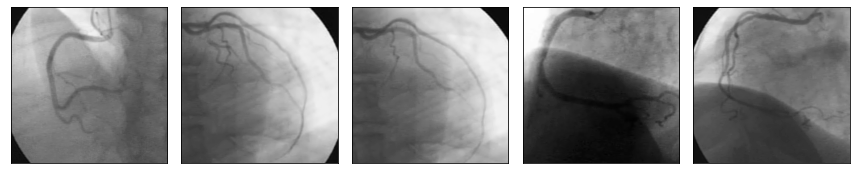

In [33]:
# Nos ubicamos en el directorio de las imagenes
os.chdir("/content/drive/My Drive/Colab Notebooks/data/Database_134_Angiograms/") # (SE PUDE MODIFICAR PARA REVISION)
# Numero de imagenes a procesar/imprimir
n_images, n_images_train = 134, 100
# Generamos los nombres de las imagenes
file_path = names_generator(n_images)

images_angio = []
for path in file_path:
    # Lectura de la imagen
    image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    # Convertimos al negativo de la imagen
    """
    image = cv2.bitwise_not(image)
    """
    # Agregamos imagen a lista de imagenes
    images_angio.append(image)
print_images(images_angio[:5], 1, 5)

### G.T. de imágenes

G_T no binario con indice: 43
{'0': 1, '255': 1, '248': 1, '253': 1, '254': 1, '242': 1, '249': 1, '247': 1, '251': 1, '234': 1, '250': 1, '252': 1, '246': 1, '243': 1, '227': 1}
G_T no binario con indice: 65
{'0': 1, '255': 1, '1': 1}
G_T no binario con indice: 69
{'0': 1, '1': 1, '5': 1, '255': 1, '230': 1, '6': 1, '3': 1, '2': 1, '4': 1, '253': 1, '252': 1, '224': 1, '248': 1, '8': 1}
G_T no binario con indice: 72
{'0': 1, '255': 1, '19': 1, '66': 1, '48': 1, '6': 1, '20': 1, '55': 1, '54': 1, '16': 1, '9': 1}
G_T no binario con indice: 78
{'0': 1, '255': 1, '2': 1, '4': 1, '1': 1}


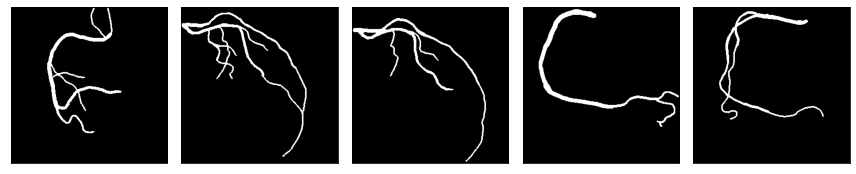

In [21]:
file_path = names_generator(n_images, '_gt')

images_gt_angio = []
for path in file_path:
    # Lectura de la imagen
    image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    # Agregamos imagen a lista de imagenes
    images_gt_angio.append(image)

# Verificamos correcta binarizacion.
for i, image_gt in enumerate(images_gt_angio):
    aux = dict({})
    for row in image_gt:
        for element in row:
            aux[str(element)] = 1
    if len(aux) != 2:
        print("G_T no binario con indice: " + str(i))
        print(aux)

print_images(images_gt_angio[0:5], 1, 5)

### Búsqueda de Template Convolucional

In [22]:
# Asignamos imagenes a memoria utilizada para calcular Az
images_train = images_angio[:n_images_train]
images_gt_train = images_gt_angio[:n_images_train]

x_opt, best_each_epoch = G_A_search(fitness_function, x_dim, d_dim, 0.0, 1.0, n, rate, 20, epsilon)
filter_angio = decode(x_opt, x_dim, d_dim).reshape(rows, cols) - 127

1 1.0
2 0.66974676921543
3 0.66974676921543
4 0.66974676921543
5 0.6819044310901392
6 0.6819044310901392
7 0.7009447616058485
8 0.7009447616058485
9 0.7009447616058485
10 0.7009447616058485
11 0.7009447616058485
12 0.7009447616058485
13 0.7264156411126178
14 0.7264156411126178
15 0.7264156411126178
16 0.7264156411126178
17 0.7264156411126178
18 0.7264156411126178
19 0.7456748116056997
20 0.7456748116056997


## Imágenes de Retina
Esta base de datos consta de 40 imágenes de retina y sus correspondiente Ground-Truth. Cada imagen está en escala __RGB__ de 584 x 565 píxeles en formato tif. 

### Lectura de imagenes.
Se deberia modificar el directorio para su poder volver a reproducir.

02 test.tif
20 test.tif
17 test.tif
19 test.tif
18 test.tif
12 test.tif
15 test.tif
13 test.tif
16 test.tif
11 test.tif
14 test.tif
09 test.tif
05 test.tif
07 test.tif
08 test.tif
04 test.tif
10 test.tif
06 test.tif
03 test.tif
01 test.tif
24_training.tif
25_training.tif
23_training.tif
22_training.tif
40_training.tif
37_training.tif
39_training.tif
38_training.tif
36_training.tif
35_training.tif
33_training.tif
32_training.tif
34_training.tif
31_training.tif
28_training.tif
30_training.tif
27_training.tif
21_training.tif
26_training.tif
29_training (1).tif


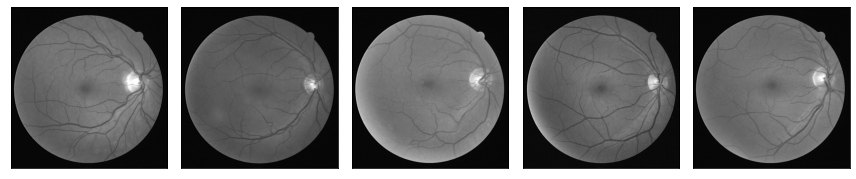

In [32]:
# Nos ubicamos en el directorio de las imagenes 
os.chdir("/content/drive/My Drive/Colab Notebooks/data/DRIVE_retina/complete/images") # (SE PUDE MODIFICAR PARA REVISION)
# Numero de imagenes a procesar/imprimir
n_images, n_images_train = 40, 20
# Generamos los nombres de las imagenes
file_path = get_names_from_path('')

images_retin = []
for path in file_path:
    print(path)
    # Lectura de la imagen
    image = cv2.imread(
        path, 
        cv2.IMREAD_COLOR
    )
    # Separamos canales, nos interesa el componente con mejor contraste (Verde)
    b,g,r = cv2.split(image)
    """
    print(g.mean())
    # El fondo al rededor de la imagen es negro, lo cambiamos
    g[ g < 30] = 200
    """
    image = g
    # Convertimos al negativo de la imagen
    #image = cv2.bitwise_not(image)
    # Agregamos imagen a lista de imagenes 
    images_retin.append(image)
print_images(images_retin[:5], 1, 5)

### G.T. de imagenes

07_manual1.gif
08_manual1.gif
05_manual1.gif
04_manual1.gif
02_manual1.gif
06_manual1.gif
03_manual1.gif
01_manual1.gif
40_manual1.gif
38_manual1.gif
35_manual1.gif
39_manual1.gif
37_manual1.gif
34_manual1.gif
31_manual1.gif
32_manual1.gif
33_manual1.gif
22_manual1.gif
27_manual1.gif
25_manual1.gif
29_manual1.gif
30_manual1.gif
26_manual1.gif
28_manual1.gif
23_manual1.gif
24_manual1.gif
21_manual1.gif
18_manual1.gif
20_manual1.gif
19_manual1.gif
17_manual1.gif
12_manual1.gif
15_manual1.gif
13_manual1.gif
11_manual1.gif
16_manual1.gif
10_manual1.gif
14_manual1.gif
09_manual1.gif
36_manual1.gif


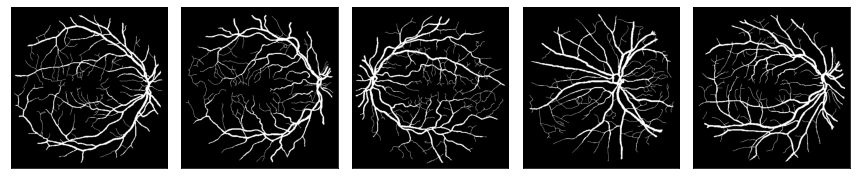

In [24]:
# Nos ubicamos en el directorio de las imagenes
os.chdir("/content/drive/My Drive/Colab Notebooks/data/DRIVE_retina/complete/1st_manual")

file_path = get_names_from_path('')

images_gt_retin = []
for path in file_path:
    print(path)
    # Obtenemos frame del gif
    cap = cv2.VideoCapture(path)
    # Lectura de la imagen
    ret, image = cap.read()
    cap.release()
    if not ret : print("Error al abrir la imagen")
    # Separamos canales, nos interesa el componente con mejor contraste (Verde)
    b,g,r = cv2.split(image)
    image = g # En este caso cualquier canal puede ser usado
    # Agregamos imagen a lista de imagenes
    images_gt_retin.append(image)

# Verificamos correcta binarizacion.
for i, image_gt in enumerate(images_gt_retin):
    aux = dict({})
    for row in image_gt:
        for element in row:
            aux[str(element)] = 1
    if len(aux) != 2:
        print("G_T no binario con indice: " + str(i))
        print(aux)

print_images(images_gt_retin[0:5], 1, 5)

### Búsqueda de Template Convolucional

In [25]:
# Asignamos imagenes a memoria utilizada para calcular Az
images_train = images_retin[:n_images_train]
images_gt_train = images_gt_retin[:n_images_train]

x_opt, best_each_epoch = G_A_search(fitness_function, x_dim, d_dim, 0.0, 1.0, n, rate, 20, epsilon)
filter_retin = decode(x_opt, x_dim, d_dim).reshape(rows, cols) - 127

1 1.0
2 0.5518218799305299
3 0.5580571955571496
4 0.5580571955571496
5 0.5580571955571496
6 0.5598976213285504
7 0.5598976213285504
8 0.5598976213285504
9 0.5598976213285504
10 0.5621198067566615
11 0.5621198067566615
12 0.5621198067566615
13 0.5621198067566615
14 0.5621198067566615
15 0.5621198067566615
16 0.5621198067566615
17 0.5621198067566615
18 0.5621198067566615
19 0.563548922588265
20 0.563548922588265


# Cálculo de índices de desempeño

Templates para angiogramas y para retina


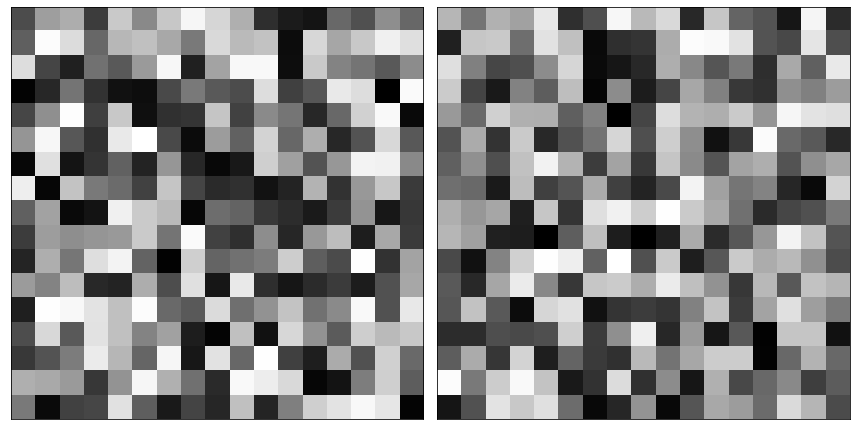

In [26]:
print('Templates para angiogramas y para retina')
print_images([filter_angio, filter_retin], 1, 2)

## Resultados en Angiogramas

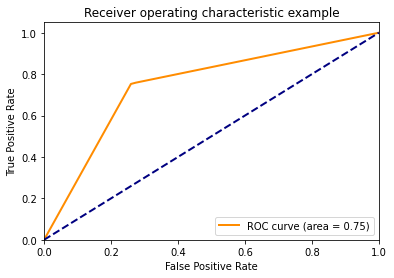

In [28]:
filtered_images_angio = []
for image in images_angio[n_images_train:]: # Sobre imagenes de test
    filtered_image = cv2.filter2D(image, -1, filter_angio)
    filtered_images_angio.append(filtered_image)

roc_auc = plot_roc_curve(images_gt_angio[n_images_train:], filtered_images_angio, plot=True)

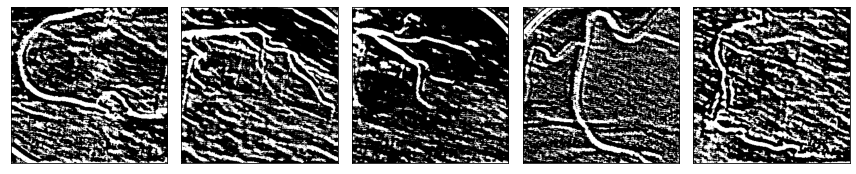

In [34]:
print_images(filtered_images_angio[:5], 1, 5)

## Resultados en imagenes de retina

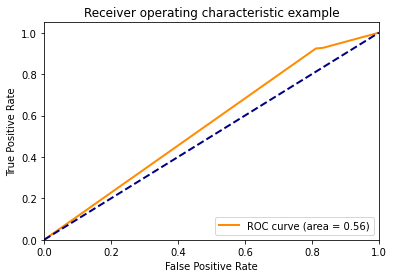

In [29]:
filtered_images_retin = []
for image in images_retin[n_images_train:]: # Sobre imagenes de test
    filtered_image = cv2.filter2D(image, -1, filter_retin)
    filtered_images_retin.append(filtered_image)

roc_auc = plot_roc_curve(images_gt_retin[n_images_train:], filtered_images_retin, plot=True)

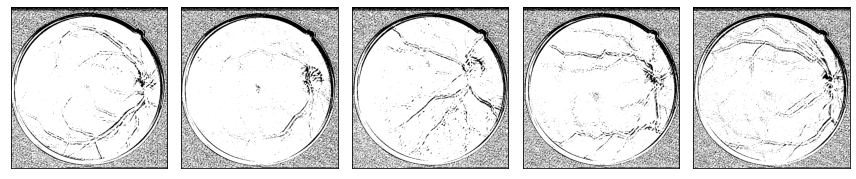

In [35]:
print_images(filtered_images_retin[:5], 1, 5)

# Experimentos

In [ ]:
print_images([images[3], filtered_images[3]], 1, 2)